# Figure 4) Energy Supply - Parameter Sensitivity
Here we create Figure 4 in Trinh+ (2026), which shows how our energy supply calculations may change when varying individual model parameters in isolation with respect to the nominal model. We organize our parameter sensitivity in order of increasing model sensitivity:
- a) pH (least sensitive)
- b) Total C
- c) Temperature
- d) Oxygen fugacity (most sensitive)

While this notebook focuses on varying the parameters of the hot reservoir, we conduct a similar exercise for the cold reservoir in `Make-Figure-S2.ipynb`.

Let's start by importing the necessary Python libraries.

In [1]:
import numpy as np
import aqequil
import pandas as pd
import matplotlib.pyplot as plt
import pychnosz
import pickle

Then we write helper functions whose purpose is defined in their respective docstrings. Essentially, `getDF()` reads the Pickle data files into a Pandas DataFrame, whereas `makeFigure4()` handles our plotting.

In [2]:
def getDF(filename):
    '''Obtain DataFrame of energy supply and solute concentration data for a 
    given mixture. The "filename" is a list of mixture objects, and "i_nom" is the 
    index of the desired mixture.'''
    # open file of fluid mixing
    with open (filename, 'rb') as file:
        mixture = pickle.load(file)
    
    # obtain energy supply DataFrame
    df_E = mixture.plot_energy(y_type = "E",
            y_units = "cal",
            x_type='temperature',
            show_zero_line = True,
            species = ["CO2", "H2", "CH4", "H2O"],
            stoich = [-1, -4, 1, 2],
            df_out = True,)
    df_E = df_E[1]

    # translate Xi to fluid mass ratio
    df1 = df_E[df_E['Xi']<=1] # values where vent fluid < seawater mass
    tmp1 = 1/np.array(df1['Xi'].tolist()[1:])
    tmp1C = df1['Temp(C)'].tolist()[1:]
    
    df2 = df_E[df_E['Xi']>=1] # values where vent fluid > seawater mass
    tmp2 = 2-np.array(df2['Xi'].tolist())
    tmp2C = df2['Temp(C)']

    mass_ratios = tmp1.tolist() + tmp2.tolist() # kg of seawater added to vent fluid

    # obtain aqueous species DataFrame
    sp = ['CO2', 'CH4', 'H2', 'HCO3-', 'H+']
    df_aq = mixture.aq_distribution_logmolal[sp]

    # compute minimum energy supply
    Alim = 10.6e3 # minimum energy supply for methanogens (J / mol CH4) (Hoehler+, 2001)
    J2cal = 0.2390 # calories in a joule
    H2_molality = 10**df_aq['H2'] # concentration of H2 (molal)
    #Emin = Alim*J2cal*H2_molality/4

    # specify columns of interest
    tmp_data = {'Xi': df_E['Xi'],
              'Mass ratio': mass_ratios,
              'Temp(C)': df_E['Temp(C)'],
              'Press(bars)': df_E['Press(bars)'],
              'pH': df_E['pH'],
              'log fO2': df_E['log fO2'],
              'CO2': df_aq['CO2'],
              'CH4': df_aq['CH4'], 
              'H2': df_aq['H2'],
              'HCO3-': df_aq['HCO3-'],
              'H+': df_aq['H+'],
              'E (cal/kg fluid)': df_E['E, cal/kg fluid']
             }
    df = pd.DataFrame(tmp_data)
    return df

def makeFigure4(filenames, include_labels=True):
    '''Plot nominal model and individual parameter sensitivity.'''
    # get DataFrames for each model
    dfarr = []
    for i in range(len(filenames)):
        dfarr.append(getDF(filenames[i]))
    dfN, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18 = dfarr

    # helpful misc.
    Tmax = 500
    eng = 'E (cal/kg fluid)'
    
    # create figure skeleton
    fsize = (4, 10)
    fs = 8 # font size
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=fsize)
    ax0, ax1, ax2, ax3 = axes.flatten()

    # plot styling
    lw_nom = 2
    lw_ps = 1
    cless = 'tab:blue'
    cmore = 'tab:red'

    # plot Figure 4b (hot res - pH)
    ax0.plot(dfN['Temp(C)'], dfN[eng], color='black', lw=lw_nom)
    ax0.plot(df9['Temp(C)'], df9[eng], color=cless, lw=lw_ps)
    ax0.plot(df10['Temp(C)'], df10[eng], color=cmore, lw=lw_ps)
    ax0.plot([0, 500], [0, 0], 'k--')
    ax0.set_xlim([0, Tmax])
    ax0.set_xticklabels([])
    ax0.tick_params(top=True, axis='both', labelsize=8)
    ax0.axvspan(122, Tmax, facecolor='black', alpha=0.1)

    # plot Figure 4d (hot res - total C)
    ax1.plot(dfN['Temp(C)'], dfN[eng], color='black', lw=lw_nom)
    ax1.plot(df11['Temp(C)'], df11[eng], color=cless, lw=lw_ps)
    ax1.plot(df12['Temp(C)'], df12[eng], color=cmore, lw=lw_ps)
    ax1.plot([0, 500], [0, 0], 'k--')
    ax1.set_xlim([0, Tmax])
    ax1.set_xticklabels([])
    ax1.tick_params(top=True, axis='both', labelsize=8)
    ax1.axvspan(122, Tmax, facecolor='black', alpha=0.1)

    # plot Figure 4f (hot res - T)
    ax2.plot(dfN['Temp(C)'], dfN[eng], color='black', lw=lw_nom)
    ax2.plot(df13['Temp(C)'], df13[eng], color=cless, lw=lw_ps)
    ax2.plot(df14['Temp(C)'], df14[eng], color=cless, lw=lw_ps)
    ax2.plot(df15['Temp(C)'], df15[eng], color=cless, lw=lw_ps)
    ax2.plot(df16['Temp(C)'], df16[eng], color=cless, lw=lw_ps)
    ax2.plot([0, 500], [0, 0], 'k--')
    ax2.set_xlim([0, Tmax])
    ax2.set_xticklabels([])
    ax2.tick_params(top=True, axis='both', labelsize=8)
    ax2.axvspan(122, Tmax, facecolor='black', alpha=0.1)

    # plot Figure 4h (hot res - log fO2)
    ax3.plot(dfN['Temp(C)'], dfN[eng], color='black', lw=lw_nom)
    ax3.plot(df17['Temp(C)'], df17[eng], color=cless, lw=lw_ps)
    ax3.plot(df18['Temp(C)'], df18[eng], color=cmore, lw=lw_ps)
    ax3.plot([0, 500], [0, 0], 'k--')
    ax3.set_xlim([0, Tmax])
    ax3.tick_params(top=True, axis='both', labelsize=8)
    ax3.axvspan(122, Tmax, facecolor='black', alpha=0.1)

    # add labels and tick values (or not)
    if include_labels:
        for ax in axes.flatten():
            ax.set_ylabel('Energy supply\n(cal / kg of fluid)', fontsize=fs)
        ax3.set_xlabel(r'$T_{mix}$ (C)')
    else:
        for ax in axes.flatten():
            ax.set_yticklabels([])
            ax.set_xticklabels([])
        plt.savefig('Figure 4 - raw.svg')

Then plot the nominal model and parameter sensitivity for the hot reservoir.

reset: thermodynamic system initialized


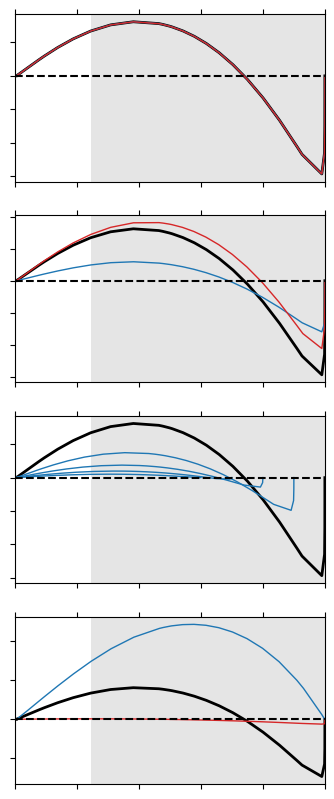

In [3]:
mnames = []
for i in range(19):
    mnames.append('ps_output_' + str(i) + '.pkl')
makeFigure4(mnames, include_labels=False)

To see the parameter sensitivity for the cold reservoir as well, visit `Make Figure S2.ipynb`.